# Problem Set 4 Advanced Data Analysis

#### Louis Droz, Jørgen Mellem, Anais Berney

## Exercise 1

#### Part a)

K-Means is part of the partition-based clustering methods.
The K-mean method identifies k number of centroids, 
and allocates every point to the nearest cluster, while keeping
the centroids as small as possible.
The 'means' in the K-means refers to averaging of the data; 
thus finding the centroid.

In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.DataFrame(
    data={
        'X_value':[0,0.4,0,1,0.8,1,0.6],
        'Y_value':[0,0,0.4,1,1,0.8,0.6]
    }
)

# Create a pandas DataFrame with the names and (x, y) coordinates
X_value = data.iloc[:, 0]
Y_value = data.iloc[:, 1]


# Preview the data
print(data)

   X_value  Y_value
0      0.0      0.0
1      0.4      0.0
2      0.0      0.4
3      1.0      1.0
4      0.8      1.0
5      1.0      0.8
6      0.6      0.6


Using K-Means
First of all, we need to specify the number of K (number of clusters)
we want out of the data.
We use K = 2.

In [6]:
# Initialise centroids
# Centroids are centers

c1 = (1.0, 0.8)
c2 = (0.6, 0.6)

In [7]:
# Write a function to calculate the Euclidean distances between points en centroids
def calculate_distance(centroid, X, Y):
    distances = []
        
    # Unpack the x and y coordinates of the centroid
    c_x, c_y = centroid
        
    # Iterate over the data points and calculate the distance using the           # given formula
    for x, y in list(zip(X, Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)
        
    return distances

In [8]:
# Apply this function to the data points and assign results in DataFrame

data['C1_Distance'] = calculate_distance(c1, data.X_value, data.Y_value)
data['C2_Distance'] = calculate_distance(c2, data.X_value, data.Y_value)

# Preview the data
print(data.head())

   X_value  Y_value  C1_Distance  C2_Distance
0      0.0      0.0     1.280625     0.848528
1      0.4      0.0     1.000000     0.632456
2      0.0      0.4     1.077033     0.632456
3      1.0      1.0     0.200000     0.565685
4      0.8      1.0     0.282843     0.447214


In [9]:
# Compare the distances and take the smallest ones
# The centroid with the smallest distance get assigns as the cluster for that data point

# Get the min distance centroids
data['Cluster'] = data[['C1_Distance', 'C2_Distance']].apply(np.argmin, axis =1)
    
# Map the centroids accordingly and rename them
data['Cluster'] = data['Cluster'].map({'C1_Distance': 'C1', 'C2_Distance': 'C2'})
    
# Get a preview of the data
print(data.head(10))

   X_value  Y_value  C1_Distance  C2_Distance Cluster
0      0.0      0.0     1.280625     0.848528      C2
1      0.4      0.0     1.000000     0.632456      C2
2      0.0      0.4     1.077033     0.632456      C2
3      1.0      1.0     0.200000     0.565685      C1
4      0.8      1.0     0.282843     0.447214      C1
5      1.0      0.8     0.000000     0.447214      C1
6      0.6      0.6     0.447214     0.000000      C2


/opt/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


In [10]:
# Update the centroids by determining the mean (K-means)


# Calculate the coordinates of the new centroids from cluster 1

x_new_centroid1 = data[data['Cluster']=='C1']['X_value'].mean()
y_new_centroid1 = data[data['Cluster']=='C1']['Y_value'].mean()

# Calculate the coordinates of the new centroid from cluster 2

x_new_centroid2 = data[data['Cluster']=='C2']['X_value'].mean()
y_new_centroid2 = data[data['Cluster']=='C2']['Y_value'].mean()


# Print the coordinates of the new centroids

print('Centroid 1 ({}, {})'.format(x_new_centroid1, y_new_centroid1))
print('Centroid 2 ({}, {})'.format(x_new_centroid2, y_new_centroid2))

Centroid 1 (0.9333333333333332, 0.9333333333333332)
Centroid 2 (0.25, 0.25)


The K-means is a partition-based method of clustering.
The main objective of this method is to partition n observations into k clusters, in which each obersvation
belongs to the cluster with the nearest mean.
We observed that when comparing the distance between each x(i) points and the centroids, 
both C1 and C2 appears the same number of times. 

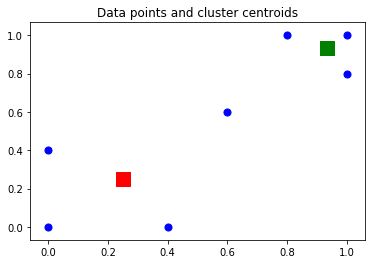

In [14]:
# Generate plot
import matplotlib.pyplot as plt

plt.scatter(X_value, Y_value, s =50, c='b')
plt.scatter(0.933333333333, 0.933333333333, s=200, c='g', marker='s') # C1
plt.scatter(0.25, 0.25, s=200, c='r', marker='s')# C2

plt.title('Data points and cluster centroids')
plt.show()

#### Part b)

In this method, we first used x6 and x7 as centroids:
x6 = c1 = (1.0, 0.8)
x7 = c2 = (0.6, 0.6)
which have been used as beginning point for every cluster.
Then the program performed iterative calculation to optimize the position of the centroids.
The k-means algorithm stops when:
- The centroids have been stabilized: no change in their values
- The defined number of iteration has been achieved (which was 10 in this example)
We observe that the centroids based on K-means algorithm: 
Centroid 1 (0.933333333333, 0.933333333333)
Centroid 2 (0.25, 0.25)
are different from the randomly selected one. 

## Exercise 2

#### Part a)

Hierarchical clustering is a method for grouping similar data points together.
The agglomerative hierarchical clustering technique is one part of Hierarchical clustering:
where each point is considered as an individual cluster. 
After each iteration, the similar cluster merge with others until one cluster is formed.
The method for Agglomerative hierarchical clustering:

    1) Compute proximity matrix
    2) Define each data point as a cluster
    3) Iterate: merge the two closest cluster together and update matrix
    4) Stops when one single cluster remains

In [18]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
import pandas as pd
get_ipython().magic(u'matplotlib inline')
from sklearn.cluster import AgglomerativeClustering

In [19]:
# We will use the data given in exercice 1. 
X = np.array([[0,0],
            [0.4,0],
            [0,0.4],
            [1,1],
            [0.8,1],
            [1,0.8],
            [0.6,0.6],])

# Preview the data
print(X)

[[0.  0. ]
 [0.4 0. ]
 [0.  0.4]
 [1.  1. ]
 [0.8 1. ]
 [1.  0.8]
 [0.6 0.6]]


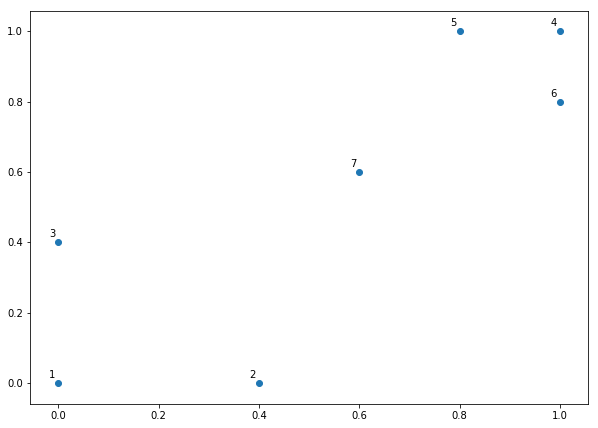

In [20]:
# Plotting the data points

import matplotlib.pyplot as plt

labels = range(1, 11)  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()  

From this plot, it becomes evident that the points forms two clusters.
One consisting of points 1-3, and another from points 4-7.

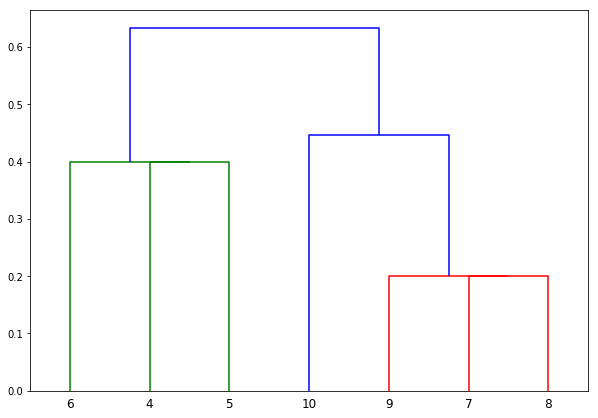

In [21]:
# Use dendograms in hierarchical clustering
linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

The code starts by finding the two closest point in term of Euclidea distance,
then it joint the cluster formed by joining two points to the nearest cluster, etc.
The algorithm stops when all the points are joined together to form one cluster.

In [22]:
# Agglomerative Hierarchical Clusterig 

# Define the cluster using sklearn.cluster library
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

# Returns the names of the clusters that each point belongs to
cluster.fit_predict(X)

print(cluster.labels_) 

[1 1 1 0 0 0 0]


The first three points have been clustered together 
and the last 4 together.

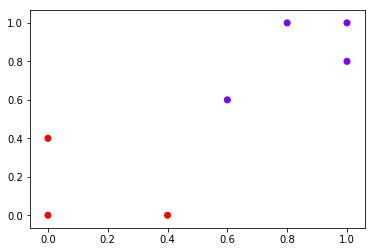

In [23]:
# PLot the cluster 
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

#### Part b)

In [24]:
# Agglomerative clustering with complete linkage

complete = AgglomerativeClustering(n_clusters=2,linkage='complete')

# Fit the dataset & predict the cluster labels
complete_pred = complete.fit_predict(X)

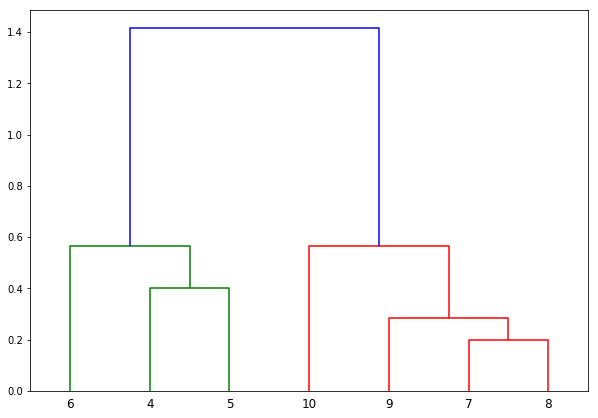

In [25]:
# Dendogram for complete linkage

linked = linkage(X, 'complete')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show() 

In [26]:
# Agglomerative clustering with average linkage

avg = AgglomerativeClustering(n_clusters=2,linkage='average')

# Fit the dataset & predict the cluster labels
avg_pred = avg.fit_predict(X)

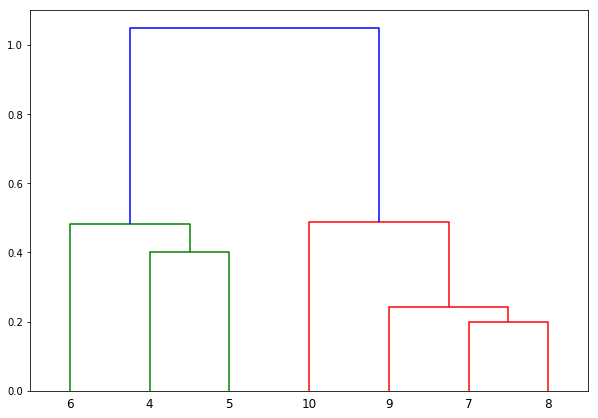

In [27]:
# Dendogram for average

linked = linkage(X, 'average')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show() 

## Exercise 3

#### Part a)

The datapoints that are cores are:

    B - C - D - E - F - G - H - I - J
    K - N - Q - R - S - T - W

#### Part b)

The data point is directly reachable from point d, as d is a core point

#### Part c)

The data point o is directly reachable from point i, using the following chain:

    i -> e -> f -> j -> n -> o 

#### Part d)

The data points l and x are not connected, as they have no common core points

#### Part e)

    Cluster 1 |  Cluster 2 |  Noise
    -------------------------------
      a       |    b       |   u
      d       |    c       |
      h       |    e       |
      k       |    f       |
      p       |    g       |
      q       |    i       |
      v       |    j       |
      r       |    n       |
      s       |    m       |
      t       |    o       |
      l       |            |
      w       |            |
      x       |            |
    -------------------------------
    

## Exercise 4

In [29]:
import numpy as np
from math import exp

In [30]:
# Define a function ann to conduct the artificial neural net
def ann(x1, x2):
    
    X = np.array([[x1], [x2]])  #define an array of the inputs 
    
    W01 = np.array([[0.1], [-0.2]]) #define the weights for the first layer
    W1= np.array([[0.5, -0.4], [0.7, 0.8]])

    W02 = np.array([[-1.0], [0.8]])  #define the weights of the second layer
    W2 = np.array([[0.9, -0.7], [0.4, 1.0]])

    W03 = np.array([[0.8]]) #define the weights of the third layer
    W3 = np.array([[-0.5, 0.3]])

    a2 = W01 + W1.dot(X) #iterate throught the layers
    a3 = W02 + W2.dot(a2)
    a4 = W03 + W3.dot(a3)
    y = 1/(1+exp(-a4))
    return y

#execute the function for the 3 given input coordinates 
a = ann(0.7, 1)
b = ann(-0.5, 2.5)
c = ann(-3.0, 3.0)

#print the results
print("a)    {0:.4f}".format(a))
print("b)    {0:.4f}".format(b))
print("c)    {0:.4f}".format(c))

a)    0.9031
b)    0.9459
c)    0.9215


## Exercise 5

#### Part a)

In [49]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

The dataset contains two variables with a total of 272 observations.
The first variable records the eruption time in minutes, whilst the second
variable measures the waiting time in minutes.

In [50]:
# Importing the data
data = pd.read_csv("faithful.csv", sep=",")
# Removing the first column, as it has no real use in our application
data = data.iloc[:, [1, 2]]
print(data.head())
print(type(data))

   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85
<class 'pandas.core.frame.DataFrame'>


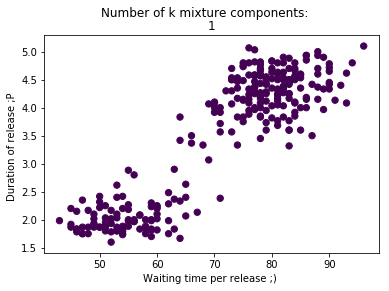

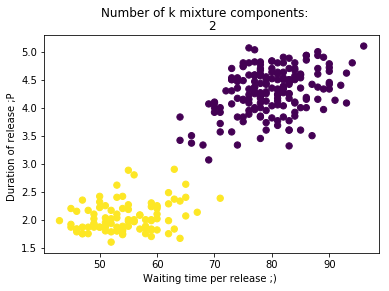

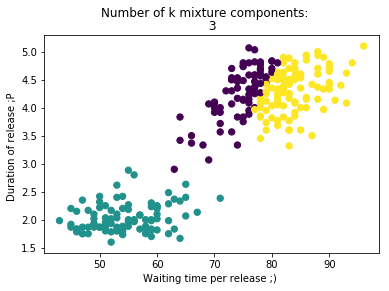

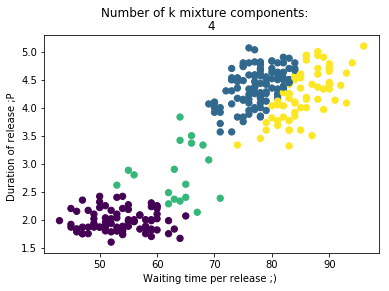

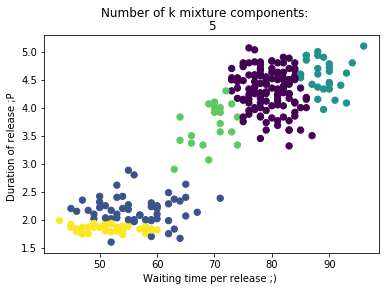

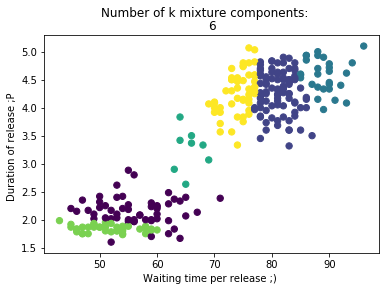

In [51]:
#Plotting the GMM over 6 iterations of k. 

# Setting X equal to the minutes between each eruption
X = data.iloc[:, 1]
X = X.values.reshape(-1, 1)

# Setting y equal to the duration of each eruption
y = data.iloc[:, 0]

k_list = list(range(1, 7))
for k in k_list:

    gmm = mixture.GaussianMixture(n_components=k, covariance_type="full")
    gmm = gmm.fit(data)
    labels = gmm.predict(data)
    plt.scatter(X, y, c=labels, s=40, cmap="viridis")
    plt.xlabel("Waiting time per release ;) ")
    plt.ylabel("Duration of release ;P ")
    plt.suptitle("Number of k mixture components: ")
    plt.title(k)
    plt.show()

#### Part b)

We can initially see that there are two clusters in the data. However, to
further justify our answer there are several steps we can take.
What we will do to verify the clustering is to train and test the set at 
an 80/20 split to show that 80% of the training data can explain the rest of
the 20% of the test/validation data. 

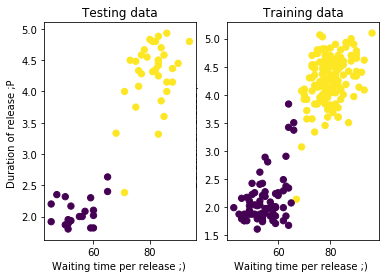

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

# Fitting the training data
gmm = mixture.GaussianMixture(n_components=2, covariance_type="full")
gmm = gmm.fit(X_train)

fig = plt.figure()
# Plotting the training data
labels = gmm.predict(X_train)
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, c=labels, s=40, cmap="viridis")
plt.xlabel("Waiting time per release ;) ")
plt.ylabel("Duration of release ;P ")
plt.title("Training data")

# Plotting the testing data
labels = gmm.predict(X_test)
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, c=labels, s=40, cmap="viridis")
plt.xlabel("Waiting time per release ;) ")
plt.ylabel("Duration of release ;P ")
plt.title("Testing data")

plt.show()

We see from the plot of both the training and testing data that the GMM model is 
able with the training data to create good predictive parameters that match 
the testing data. 
From this we strengthen our belief that there is 2 clusters of the data. 

## Exercise 6

Exercise 6 is done in a seperate pdf-file named PS4_Droz_Mellem_Berney_Ex_6.pdf

## Execise 7

#### Part a)

The dataset is made up of images of handwritten numbers in the range (0,9). It consists of a training set of 60.000 examples, and a testing set of 10.000 examples. The Training set is divided into 50.000 training and 10.000 validating examples. The images of the numbers are normalized in terms of size (28 x 28 pixels), where the colors are in shades from black to white. 

#### Part b)

The functions in the MLP class 

init: 

    - initiates the class parameters, sets up the network size, and initializes randomly the weights of the network itself

earlystopping:

    - trains the data until the error becomes “constant”, to a level where it changes less than 0.001 	from one iteration to the next. Then it stops the training of the parameters to avoid overfitting. 
    - Implements the early stopping 


mlptrain:

    - the function goes through n number of iterations where it:
    - prints the current iteration and its error
    - uses activation functions to train the weights 
    - the activation function can be of type linear, logistic, or softmax

mlpfwd:

    - forward propagation with the trained weights in the neural network for the chosen activation functions (linear, logistic, softmax)

confmat:

    - Develops a confusion matrix for the iteratio, and prints it out 
    - prints out Percentage of correctness. 



#### Part c)

As cPickle only works in python 2, and using pickle yields a UnicodeDecodeError, exercise 7c has been done in a separate python 2 jupyter notebook named PS4_Droz_Mellem_Berney_Ex_7c.